<h1>Importing data</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import optuna

from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
import optuna
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib









<h1>Reading data</h1>

In [2]:
df = pd.read_csv("loan.csv")


In [3]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<h1>Data Cleaning</h1>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")

In [8]:
df = df.rename(columns={
    'applicantincome': 'applicant_income',
    'coapplicantincome': 'coapplicant_income',
    'loanamount': 'loan_amount'
})


In [9]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status'],
      dtype='object')

In [10]:
df.shape

(614, 13)

C:\Users\M.Zaid Naeem\AppData\Local\Temp\ipykernel_6104\2001550099.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', palette='Set2')


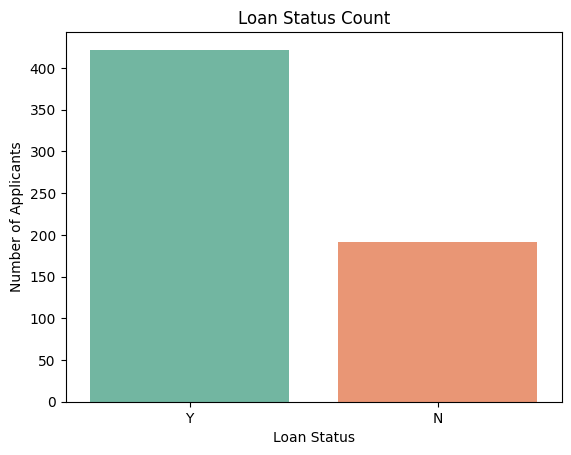

In [11]:
sns.countplot(data=df, x='loan_status', palette='Set2')
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Number of Applicants')
plt.show()

In [12]:
df.describe()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
df.isnull().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [14]:
df['loan_amount'] = df['loan_amount'].fillna(df['loan_amount'].mean())

In [15]:
df['loan_amount']

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: loan_amount, Length: 614, dtype: float64

In [16]:
df['loan_amount_term'] = df['loan_amount_term'].fillna(df['loan_amount_term'].mean())

In [17]:
df['loan_amount_term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [20]:
df

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [21]:
df['loan_status'] = df['loan_status'].replace(['N', 'Y'], [0, 1])


C:\Users\M.Zaid Naeem\AppData\Local\Temp\ipykernel_6104\3242512893.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status'] = df['loan_status'].replace(['N', 'Y'], [0, 1])


In [22]:
df['loan_status'].unique()

array([1, 0])

In [23]:
df['dependents'] = df['dependents'].replace(['3+'],['4'])

In [24]:
df['dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [25]:
df['dependents'] = df['dependents'].astype('int64')

In [26]:
df

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


<h1>Data Visualization </h1>

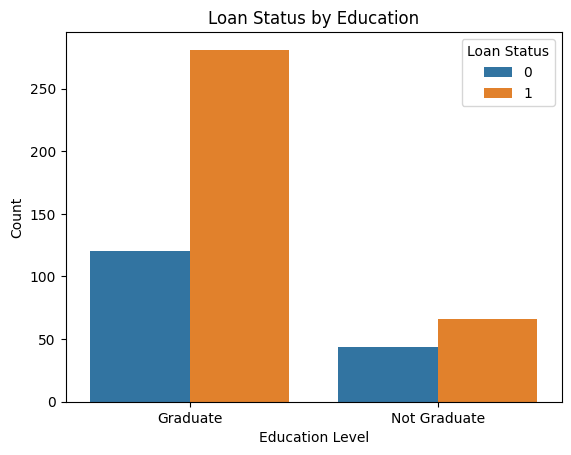

In [27]:
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Loan Status by Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

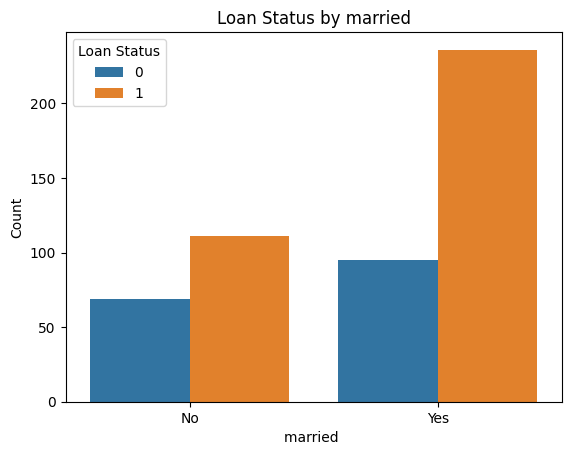

In [28]:
sns.countplot(x='married', hue='loan_status', data=df)
plt.title('Loan Status by married')
plt.xlabel('married ')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

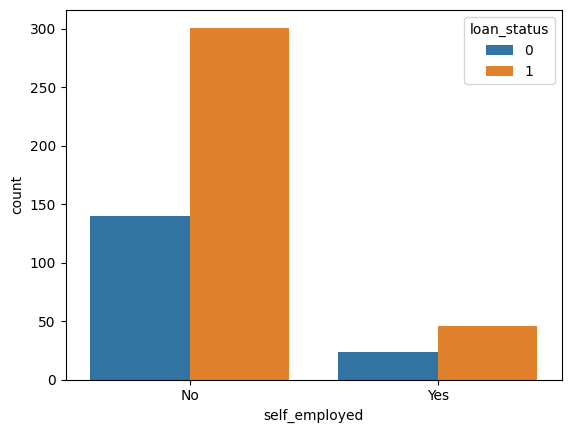

In [29]:
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.show()

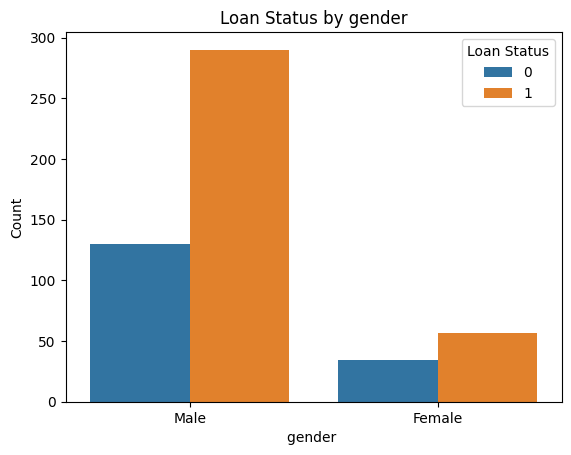

In [30]:
sns.countplot(x='gender', hue='loan_status', data=df)
plt.title('Loan Status by gender')
plt.xlabel('gender ')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

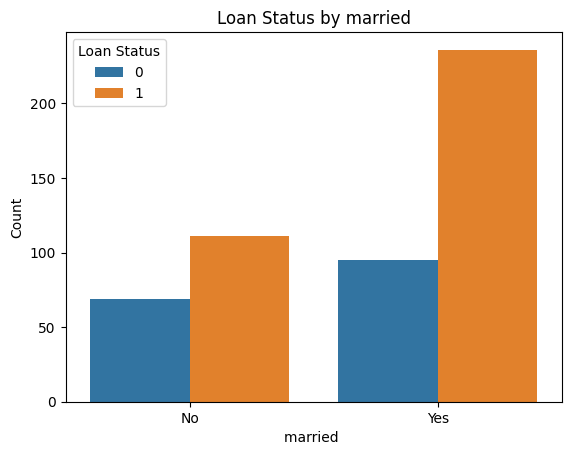

In [31]:
sns.countplot(x='married', hue='loan_status', data=df)
plt.title('Loan Status by married')
plt.xlabel('married ')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

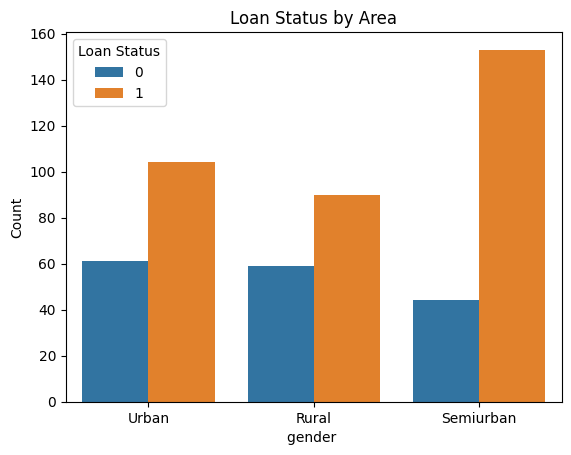

In [32]:
sns.countplot(x='property_area', hue='loan_status', data=df)
plt.title('Loan Status by Area')
plt.xlabel('gender ')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [33]:
df['property_area'].value_counts()

property_area
Semiurban    197
Urban        165
Rural        149
Name: count, dtype: int64

In [34]:
numerical_columns = df.select_dtypes(include = ['int64','float64']).columns[:-1]
numerical_columns

Index(['dependents', 'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history'],
      dtype='object')

In [35]:
# convert categorical columns to numerical values
df.replace({'married':{'No':0,'Yes':1},'gender':{'Female':0,'Male':1},'self_employed':{'No':0,'Yes':1},
                      'property_area':{'Rural':0,'Urban':1,'Semiurban':2},'education':{'Graduate':1,'Not Graduate':0}},inplace=True)

C:\Users\M.Zaid Naeem\AppData\Local\Temp\ipykernel_6104\2388290373.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'married':{'No':0,'Yes':1},'gender':{'Female':0,'Male':1},'self_employed':{'No':0,'Yes':1},


In [36]:
df

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,1


In [37]:
df.shape

(511, 13)

In [38]:
df=df.drop(columns=['loan_id'])
df

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,1


In [39]:
df.shape[1] - df.select_dtypes(include=['int64','float64']).columns.size

0

In [40]:
# separating the data and label
X = df.drop(columns=['loan_status'],axis=1)
Y = df['loan_status']

In [41]:
X

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1


In [42]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.12,stratify=Y,random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(511, 11) (449, 11) (62, 11)


In [44]:
numerical_columns

Index(['dependents', 'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history'],
      dtype='object')

<h1>Standrad Scaling</h1>

In [45]:

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on training set
X_train_scaled_part = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled_part = scaler.transform(X_test[numerical_columns])

# Convert back to DataFrame with same index/column names
X_train_scaled_part = pd.DataFrame(X_train_scaled_part, columns=numerical_columns, index=X_train.index)
X_test_scaled_part = pd.DataFrame(X_test_scaled_part, columns=numerical_columns, index=X_test.index)

# Keep the other columns untouched
X_train_rest = X_train.drop(columns=numerical_columns)
X_test_rest = X_test.drop(columns=numerical_columns)

# Concatenate scaled and unscaled columns
X_train_final = pd.concat([X_train_scaled_part, X_train_rest], axis=1)
X_test_final = pd.concat([X_test_scaled_part, X_test_rest], axis=1)


In [46]:
X_train_final

,dependents,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,gender,married,education,self_employed,property_area
78,2.539823,-0.381707,0.893308,0.470926,-0.708762,-2.346752,1,1,1,0,2
555,0.111759,0.016884,-0.218108,-1.561118,0.270420,0.426121,1,1,1,0,2
529,-0.697595,0.244675,-0.604557,-0.188829,0.270420,0.426121,1,0,0,0,2
21,0.111759,0.101245,1.501815,2.252264,0.270420,0.426121,1,1,1,0,1
35,-0.697595,-0.536224,0.169465,0.027732,0.270420,0.426121,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
199,-0.697595,0.975166,-0.604557,-0.808998,0.270420,0.426121,1,0,1,1,1
297,0.111759,-0.122043,-0.604557,-0.122853,0.270420,0.426121,0,1,1,0,1
20,-0.697595,0.396593,-0.604557,-0.531901,0.270420,-2.346752,1,1,0,0,1
274,0.921114,-0.254733,-0.604557,-0.716632,0.270420,0.426121,1,1,1,0,2


<h1>Model Training</h1>

In [47]:
xgb_model = XGBClassifier( eval_metric='logloss')  # Suppress warning
xgb_model.fit(X_train_final, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [48]:
y_pred = xgb_model.predict(X_test_final)


In [49]:
# accuracy score on training data
X_train_prediction = xgb_model.predict(X_train_final)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [50]:
# accuracy score on training data
X_test_prediction = xgb_model.predict(X_test_final)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [51]:
print(training_data_accuray)

1.0


In [52]:
print(test_data_accuray)

0.8870967741935484


In [53]:
X_train_final.shape

(449, 11)

In [54]:
print(xgb_model.get_params())


{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [55]:
df.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [56]:
X_train_final

,dependents,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,gender,married,education,self_employed,property_area
78,2.539823,-0.381707,0.893308,0.470926,-0.708762,-2.346752,1,1,1,0,2
555,0.111759,0.016884,-0.218108,-1.561118,0.270420,0.426121,1,1,1,0,2
529,-0.697595,0.244675,-0.604557,-0.188829,0.270420,0.426121,1,0,0,0,2
21,0.111759,0.101245,1.501815,2.252264,0.270420,0.426121,1,1,1,0,1
35,-0.697595,-0.536224,0.169465,0.027732,0.270420,0.426121,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
199,-0.697595,0.975166,-0.604557,-0.808998,0.270420,0.426121,1,0,1,1,1
297,0.111759,-0.122043,-0.604557,-0.122853,0.270420,0.426121,0,1,1,0,1
20,-0.697595,0.396593,-0.604557,-0.531901,0.270420,-2.346752,1,1,0,0,1
274,0.921114,-0.254733,-0.604557,-0.716632,0.270420,0.426121,1,1,1,0,2


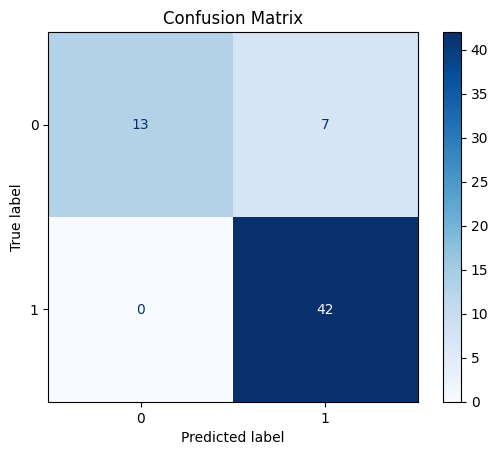

In [57]:
cm = confusion_matrix(Y_test, X_test_prediction)

# Step 2: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Accuracy at threshold 0.6: 0.8871


<h1>HyperPramter tuning using optuna</h1>

In [354]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100,1000 ),
        'max_depth': trial.suggest_int('max_depth', 10, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.03, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 10.0),
        'random_state': 42,
        'eval_metric': 'logloss',
        
    }

    model = XGBClassifier(**param)

    # 5-Fold Stratified Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_final, Y_train, scoring='accuracy', cv=skf)

    return score.mean()


In [355]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300, show_progress_bar=True)


[I 2025-07-17 15:34:50,318] A new study created in memory with name: no-name-5d961f10-8364-4640-aec5-33f0c7ed0fe8


  0%|          | 0/300 [00:00<?, ?it/s]

[I 2025-07-17 15:34:51,640] Trial 0 finished with value: 0.779525593008739 and parameters: {'n_estimators': 273, 'max_depth': 20, 'learning_rate': 0.029516689614124174, 'subsample': 0.7455736720225357, 'colsample_bytree': 0.9916933426496319, 'gamma': 1.0853117311000053, 'min_child_weight': 3, 'reg_alpha': 4.262674946413493, 'reg_lambda': 1.2149573078904523, 'scale_pos_weight': 4.201735273167635}. Best is trial 0 with value: 0.779525593008739.
[I 2025-07-17 15:34:54,208] Trial 1 finished with value: 0.7527590511860175 and parameters: {'n_estimators': 717, 'max_depth': 19, 'learning_rate': 0.008574599064488203, 'subsample': 0.7927677025415674, 'colsample_bytree': 0.7909308155931485, 'gamma': 3.9487309734630167, 'min_child_weight': 6, 'reg_alpha': 3.0676914142777956, 'reg_lambda': 4.247148229597332, 'scale_pos_weight': 5.3316087190927535}. Best is trial 0 with value: 0.779525593008739.
[I 2025-07-17 15:34:55,636] Trial 2 finished with value: 0.7194007490636704 and parameters: {'n_estimato

KeyboardInterrupt: 

In [357]:
# Save model to file
joblib.dump(xgb_model, "loaneligibilitypredictor.pkl")

['loaneligibilitypredictor.pkl']

In [358]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [359]:
X_train.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'property_area'],
      dtype='object')

In [363]:
X_train[numerical_columns].describe().loc[['min','max'],:]

,dependents,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
min,0.0,645.0,0.0,9.0,36.0,0.0
max,4.0,81000.0,33837.0,600.0,480.0,1.0


In [368]:
checking = pd.read_csv("loan.csv")


In [369]:
checking.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [371]:
for col in ['Gender', 'Married', 'Self_Employed', 'Property_Area', 'Education']:
    print(f"{col}: {checking[col].unique()}")


Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']
Education: ['Graduate' 'Not Graduate']
